<a href="https://colab.research.google.com/github/varshitha-2319/Solar-panel-tilt-angle-prediction/blob/main/Solar_panel_tilt_angle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/solar_data.csv')

In [ ]:
df.head(10)

,YEAR,MO,DY,HR,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,QV2M,T2M,WS10M
0,2021,1,1,5,0.00,0.00,-999.00,-999.00,-999.00,8.30,13.89,2.52
1,2021,1,1,6,0.00,0.00,-999.00,-999.00,-999.00,8.61,13.69,2.54
2,2021,1,1,7,42.30,38.66,0.23,0.17,83.07,8.91,15.23,2.63
3,2021,1,1,8,170.27,167.65,0.38,0.01,71.55,9.09,17.99,3.12
4,2021,1,1,9,326.15,321.80,0.48,0.03,61.27,9.34,21.03,2.11
5,2021,1,1,10,431.30,436.83,0.52,0.09,53.01,9.22,25.00,1.79
6,2021,1,1,11,529.62,531.93,0.56,0.09,47.85,9.28,27.58,1.94
7,2021,1,1,12,473.12,472.57,0.49,0.09,46.84,9.40,28.83,1.94
8,2021,1,1,13,437.33,433.55,0.48,0.07,50.21,9.46,29.43,2.20
9,2021,1,1,14,334.48,338.90,0.45,0.04,57.20,9.46,29.38,2.48


In [ ]:
df.tail()

,YEAR,MO,DY,HR,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,QV2M,T2M,WS10M
26299,2024,1,2,0,-999.0,-999.0,-999.0,-999.0,-999.0,7.02,15.79,2.89
26300,2024,1,2,1,-999.0,-999.0,-999.0,-999.0,-999.0,7.32,15.14,2.85
26301,2024,1,2,2,-999.0,-999.0,-999.0,-999.0,-999.0,7.75,14.54,2.81
26302,2024,1,2,3,-999.0,-999.0,-999.0,-999.0,-999.0,8.18,13.98,2.80
26303,2024,1,2,4,-999.0,-999.0,-999.0,-999.0,-999.0,8.61,13.44,2.79


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [ ]:
df.shape

(26304, 12)

In [ ]:
def cal_zenith_angle(row):

    if row['SZA'] != -999:
        return row['SZA']

    day = row['DY']
    hour = row['HR']

    delta = 23.45 * math.sin(360 * (day - 80) / 365) # declination angle
    omega = 15 * (hour - 12) # hour angle
    theta =  math.acos((math.sin(23.03) * math.sin(delta)) + (math.cos(23.03) * math.cos(delta) * math.cos(omega)))
    return 90 - theta

In [ ]:
df['new_SZA'] = df.apply(lambda x: cal_zenith_angle(x), axis=1)
df['tilt'] = 90 - df['new_SZA']
df.drop(['SZA', 'new_SZA'], axis=1, inplace=True)

In [ ]:
df

,YEAR,MO,DY,HR,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SRF_ALB,QV2M,T2M,WS10M,tilt
0,2021,1,1,5,0.00,0.00,-999.00,-999.00,8.30,13.89,2.52,0.604639
1,2021,1,1,6,0.00,0.00,-999.00,-999.00,8.61,13.69,2.54,0.514336
2,2021,1,1,7,42.30,38.66,0.23,0.17,8.91,15.23,2.63,6.930000
3,2021,1,1,8,170.27,167.65,0.38,0.01,9.09,17.99,3.12,18.450000
4,2021,1,1,9,326.15,321.80,0.48,0.03,9.34,21.03,2.11,28.730000
...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2024,1,2,0,-999.00,-999.00,-999.00,-999.00,7.02,15.79,2.89,2.676108
26300,2024,1,2,1,-999.00,-999.00,-999.00,-999.00,7.32,15.14,2.85,2.604174
26301,2024,1,2,2,-999.00,-999.00,-999.00,-999.00,7.75,14.54,2.81,2.513745
26302,2024,1,2,3,-999.00,-999.00,-999.00,-999.00,8.18,13.98,2.80,2.737444


In [ ]:
df = df[(df['CLRSKY_SFC_SW_DWN'] != -999) & (df['ALLSKY_SFC_SW_DWN'] != -999) & (df['ALLSKY_KT'] != -999) & (df['ALLSKY_SRF_ALB'] != -999)]

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.shape

(13363, 14)

In [ ]:
correlation = df.corr()

<Axes: >

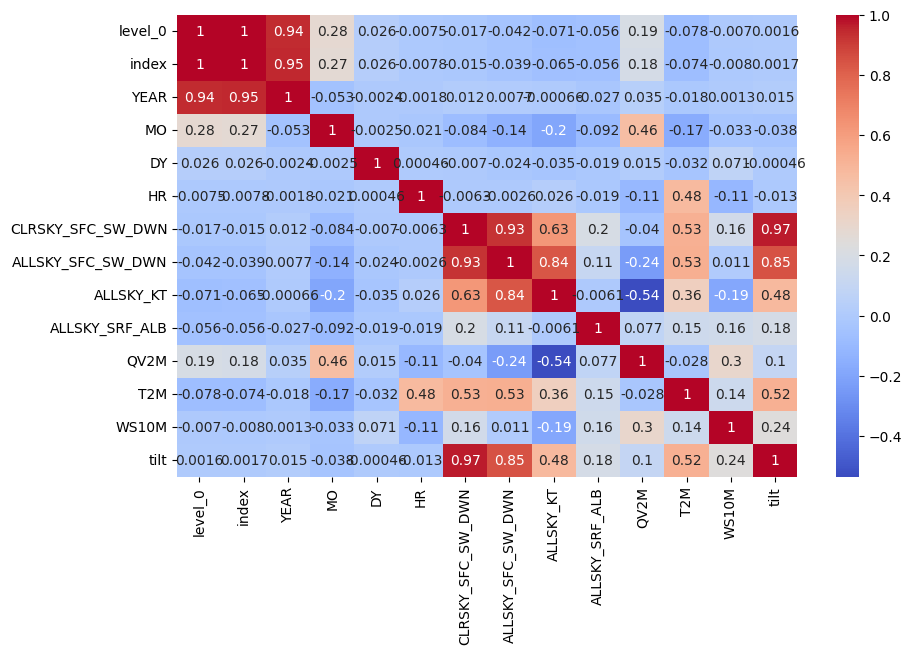

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import math
data_df = df.drop(['tilt'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_df, df["tilt"], random_state=42, test_size=0.20)
size_scaler = StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Split train into training & validation set
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Create an imputer to replace NaN with the mean
imputer = SimpleImputer(strategy='mean') # or strategy='median', 'constant'

# Fit the imputer on the training data and transform both training and validation data
X_train_sub = imputer.fit_transform(X_train_sub)
X_val = imputer.transform(X_val)
X_test_scaled = imputer.transform(X_test_scaled) # Also apply to test data

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(random_state=42, verbose=-1),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

results = []

for name, model in models.items():
    model.fit(X_train_sub, y_train_sub)


    y_train_pred = model.predict(X_train_sub)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test_scaled)


    train_mae = mean_absolute_error(y_train_sub, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_rmse = np.sqrt(mean_squared_error(y_train_sub, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    results.append({
        "Model": name,
        "Train_MAE": train_mae,
        "Val_MAE": val_mae,
        "Train_RMSE": train_rmse,
        "Val_RMSE": val_rmse,
        "Test_MAE": test_mae,
        "Test_RMSE": test_rmse
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Test_RMSE")
print(results_df)

               Model     Train_MAE   Val_MAE    Train_RMSE  Val_RMSE  \
5           CatBoost  4.784699e-01  0.633245  6.530038e-01  0.913901   
3            XGBoost  3.116330e-01  0.661799  4.241470e-01  0.975176   
4           LightGBM  5.829580e-01  0.710932  8.131556e-01  1.046921   
2      Random Forest  1.986886e-01  0.521186  3.821449e-01  1.030401   
1      Decision Tree  6.231373e-18  0.769752  1.996219e-16  1.599353   
6                SVR  1.854512e+00  1.873547  3.221081e+00  3.341496   
0  Linear Regression  2.900895e+00  2.862644  3.835293e+00  3.765572   
7                KNN  2.296986e+00  2.749210  3.321837e+00  3.899017   

   Test_MAE  Test_RMSE  
5  0.667884   1.028563  
3  0.694777   1.106734  
4  0.769424   1.213661  
2  0.579386   1.275858  
1  0.838343   1.910455  
6  1.883645   3.204265  
0  2.989609   3.994931  
7  2.883184   4.083937  


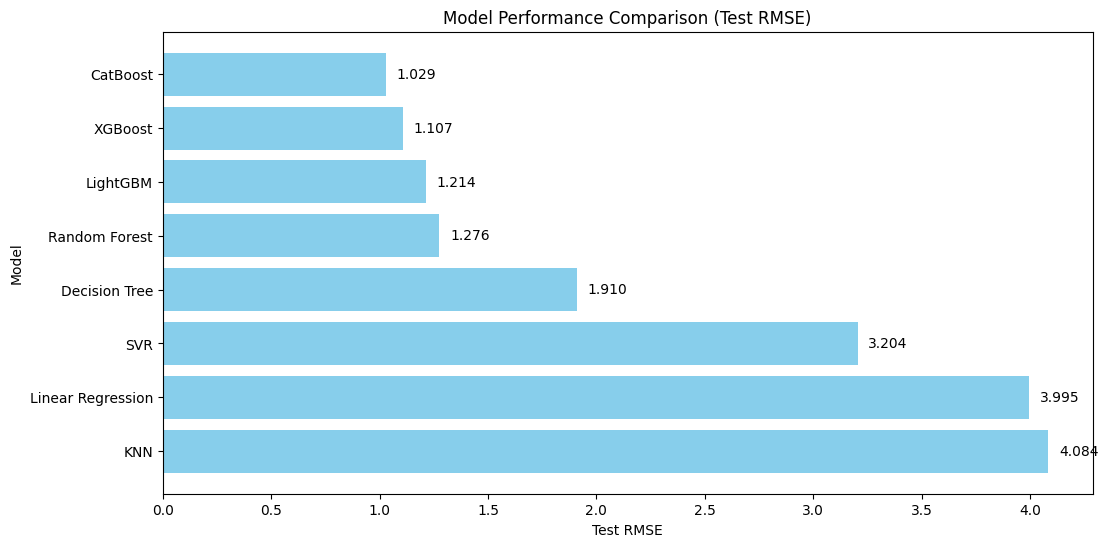

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.barh(results_df["Model"], results_df["Test_RMSE"], color='skyblue')

plt.xlabel("Test RMSE")
plt.ylabel("Model")
plt.title("Model Performance Comparison (Test RMSE)")
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.3f}',
             va='center', ha='left', fontsize=10, color='black')

plt.show()


In [ ]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

model_dict = {
    'CatBoost': {
        'model': CatBoostRegressor(random_seed=12345, verbose=0),
        'params': {
            'iterations': list(range(100, 1100, 100)),
            'depth': [4, 6, 8, 10],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'l2_leaf_reg': [1, 3, 5, 7]
        }
    },
    'XGB': {
        'model': XGBRegressor(random_state=12345, n_jobs=-1),
        'params': {
            'max_depth': [6, 7, 9],
            'n_estimators': list(range(5, 50, 5)),
            'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
            'subsample': [0.2, 0.3, 0.4],
            'gamma': [0, 0.5, 0.6, 0.7],
            'reg_lambda': [0, 1, 5, 10]
        }
    }
}

In [ ]:
import math
from sklearn.model_selection import RandomizedSearchCV

def hyperparameter_tuning(X_train_scaled, y_train, model_dict):
    best_model = None
    best_score = -math.inf
    score_type = 'neg_mean_squared_error'  # Change if needed

    for model_name, reg_model in model_dict.items():
        hyper_tuning_model = RandomizedSearchCV(
            estimator=reg_model['model'],
            param_distributions=reg_model['params'],
            n_iter=10,
            cv=5,
            return_train_score=True,
            verbose=0,
            scoring=score_type,
            refit=score_type
        )

        hyper_tuning_model.fit(X_train_scaled, y_train)
        model_res = hyper_tuning_model.best_estimator_
        best_model_score = hyper_tuning_model.best_score_

        print(f"{model_name} :: {best_model_score} {hyper_tuning_model.best_params_}")

        if best_model_score > best_score:
            best_score = best_model_score
            best_model = model_res

    print('Best Model ::', best_model)
    return best_model


In [ ]:
best_model = hyperparameter_tuning(X_train_scaled, y_train, model_dict)


CatBoost :: -0.6436168050606893 {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 900, 'depth': 8}
XGB :: -2.0842960808908324 {'subsample': 0.4, 'reg_lambda': 0, 'n_estimators': 10, 'max_depth': 9, 'learning_rate': 0.3, 'gamma': 0}
Best Model :: <catboost.core.CatBoostRegressor object at 0x78a901917bd0>


In [ ]:
df['date_time_str'] = df.apply(lambda x: f"{int(x['MO'])}/{int(x['DY'])}/{int(x['YEAR'])} {int(x['HR'])}:00:00", axis=1)
df['date_time'] = pd.to_datetime(df['date_time_str'], format="%m/%d/%Y %H:%M:%S")

In [ ]:
df = df.drop(['date_time_str'], axis=1)

In [ ]:
data = df.drop(['YEAR', 'MO', 'DY', 'HR', 'date_time'], axis=1)
dataset = data.values

training_data_len = int(np.ceil(len(dataset) * .95))
training_data_len

12695

In [ ]:
minmax_scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = minmax_scaler.fit_transform(dataset)
train_data = scaled_data[0:int(training_data_len), :]
x_train, y_train = [], []

for i in range(120,  len(train_data)):
    x_train.append(train_data[i-120:i, :-1])
    y_train.append(train_data[i, -1])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(12575, 120, 9)

In [ ]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 9))
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 9)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:
History = model.fit(x_train, y_train, batch_size=32, epochs=12, validation_split=0.15, verbose=1)


Epoch 1/12
334/334 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0307 - mae: 0.1203 - val_loss: 0.0041 - val_mae: 0.0492
Epoch 2/12
334/334 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0028 - mae: 0.0413 - val_loss: 0.0055 - val_mae: 0.0597
Epoch 3/12
334/334 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0020 - mae: 0.0353 - val_loss: 0.0036 - val_mae: 0.0478
Epoch 4/12
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0013 - mae: 0.0282 - val_loss: 0.0014 - val_mae: 0.0295
Epoch 5/12
334/334 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 6.3004e-04 - mae: 0.0193 - val_loss: 0.0011 - val_mae: 0.0265
Epoch 6/12
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 4.9487e-04 - mae: 0.0169 - val_loss: 7.9949e-04 - val_mae: 0.0226
Epoch 7/12
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 4.5165e-04 - mae: 0.0159 - val_loss: 9.7656e-04 - val_mae: 0.0244
Epoch 8/12
334/334 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 4.0877e-04 - mae: 0.0154 - val_loss: 8.6218e-04 - val_mae: 0.0232
Epoch 9/12
334/334 ━

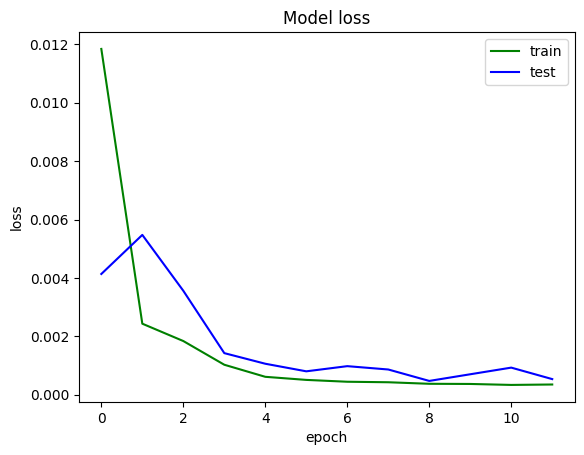

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module

plt.plot(History.history['loss'], 'g')
plt.plot(History.history['val_loss'], 'b')
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='best')
# plt.ylim([0, 0.001])
plt.savefig('Model_loss.png')
plt.show()

In [ ]:
test_data = scaled_data[training_data_len - 120:, :]
x_test = []
y_test = scaled_data[training_data_len:, -1]
for i in range(120, len(test_data)):
    x_test.append(test_data[i-120:i,:-1])

x_test = np.array(x_test)
# Change the reshape to match the training data shape (..., 9)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 9))
predictions = model.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [ ]:
pred = predictions.reshape((predictions.shape[0]))
rmse = np.sqrt(np.mean((pred - y_test) ** 2))
rmse

0.021918376276560465

In [ ]:
tmp = pd.DataFrame(scaled_data[training_data_len:,:-1])
tmp[9] = predictions.reshape(-1)
res = minmax_scaler.inverse_transform(tmp.values)
tmp = pd.DataFrame(res)
tmp2 = df.iloc[training_data_len:, :]
tmp2['pred'] = tmp[9].tolist()
print(tmp2.shape)
tmp2

(668, 16)


,level_0,index,YEAR,MO,DY,HR,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SRF_ALB,QV2M,T2M,WS10M,tilt,date_time,pred
12695,12695,24221,2023,10,7,10,827.90,824.82,0.75,0.17,16.91,28.96,2.69,53.76,2023-10-07 10:00:00,55.124231
12696,12696,24222,2023,10,7,11,904.38,896.19,0.76,0.19,17.09,30.20,2.46,59.98,2023-10-07 11:00:00,62.164331
12697,12697,24223,2023,10,7,12,899.75,889.47,0.76,0.16,17.15,31.12,2.13,59.73,2023-10-07 12:00:00,62.272812
12698,12698,24224,2023,10,7,13,819.17,803.93,0.73,0.16,17.03,31.65,1.71,53.12,2023-10-07 13:00:00,55.185746
12699,12699,24225,2023,10,7,14,669.50,670.51,0.73,0.16,16.78,31.83,1.37,42.77,2023-10-07 14:00:00,44.850965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13358,13358,25544,2023,12,1,13,514.15,469.47,0.53,0.08,12.88,29.49,3.70,39.42,2023-12-01 13:00:00,41.161127
13359,13359,25545,2023,12,1,14,371.83,333.43,0.45,0.05,12.70,29.52,3.39,31.55,2023-12-01 14:00:00,32.832546
13360,13360,25546,2023,12,1,15,203.27,182.38,0.36,0.01,12.45,28.98,3.36,21.45,2023-12-01 15:00:00,22.737027
13361,13361,25547,2023,12,1,16,66.38,59.18,0.24,0.16,12.70,27.68,2.99,9.97,2023-12-01 16:00:00,11.709651


In [ ]:
scaled_data.shape, tmp2.shape

((13363, 10), (668, 16))

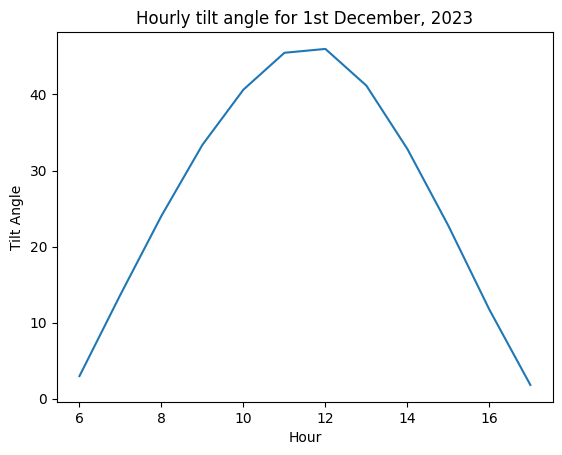

In [ ]:
val = tmp2[(tmp2['date_time'] >= pd.Timestamp(2023, 12, 1, 0)) & (tmp2['date_time'] < pd.Timestamp(2024,12,2, 0))]
sns.lineplot(data=val, x='HR', y='pred', palette='sky_blue')
plt.xlabel('Hour')
plt.ylabel('Tilt Angle')
plt.title('Hourly tilt angle for 1st December, 2023')
plt.savefig('Hourly tilt angle.png')
plt.show()

In [ ]:
x_total = []

for i in range(120,  len(scaled_data)):
    x_total.append(scaled_data[i-120:i, :-1])
x_total = np.array(x_total)
y_pred = model.predict(x_total)

414/414 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
y_pred = y_pred.reshape((y_pred.shape[0]))
df_full = pd.DataFrame(scaled_data[120:,:-1])
df_full[7] = y_pred.tolist()
df_full

,0,1,2,3,4,5,6,7,8
0,0.008981,0.009786,0.015464,0.017198,0.379747,0.517241,0.307420,0.041808,0.190172
1,0.009056,0.010334,0.057295,0.055970,0.430380,0.620690,0.329064,0.077271,0.266752
2,0.009130,0.010373,0.234068,0.234012,0.658228,0.448276,0.339664,0.213885,0.227824
3,0.009205,0.010413,0.415245,0.420729,0.784810,0.517241,0.347615,0.342992,0.209955
4,0.009280,0.010452,0.560111,0.572945,0.848101,0.620690,0.323322,0.442241,0.207403
...,...,...,...,...,...,...,...,...,...
13238,0.999701,0.999843,0.478675,0.442122,0.620253,0.275862,0.517668,0.482821,0.230377
13239,0.999775,0.999883,0.346172,0.313288,0.518987,0.172414,0.509717,0.383730,0.210593
13240,0.999850,0.999922,0.189239,0.170239,0.405063,0.034483,0.498675,0.263617,0.208679
13241,0.999925,0.999961,0.061792,0.053564,0.253165,0.551724,0.509717,0.132417,0.185067


In [ ]:
y_pred = y_pred.reshape((y_pred.shape[0]))
# Changed from scaled_data[120:,:-1] to scaled_data[120:,:] to include all columns
df_full = pd.DataFrame(scaled_data[120:,:])
# Now df_full has 10 columns, so we assign predictions to the correct one
df_full[9] = y_pred.tolist()
tmp_val = minmax_scaler.inverse_transform(df_full.values)
df_full = pd.DataFrame(tmp_val)
# Ensure the date_time column is aligned with the transformed data
df_full['date_time'] = df['date_time'].tolist()[120:]
df_full

,0,1,2,3,4,5,6,7,8,9,date_time
0,120.0,252.0,16.62,20.78,0.34,0.15,8.12,24.19,3.07,4.094000,2021-01-11 17:00:00
1,121.0,266.0,61.55,61.72,0.38,0.18,8.61,14.22,4.27,7.074594,2021-01-12 07:00:00
2,122.0,267.0,251.42,249.72,0.56,0.13,8.85,17.19,3.66,18.557071,2021-01-12 08:00:00
3,123.0,268.0,446.02,446.88,0.66,0.15,9.03,21.58,3.38,29.408481,2021-01-12 09:00:00
4,124.0,269.0,601.62,607.61,0.71,0.18,8.48,25.88,3.34,37.750370,2021-01-12 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...
13238,13358.0,25544.0,514.15,469.47,0.53,0.08,12.88,29.49,3.70,41.161127,2023-12-01 13:00:00
13239,13359.0,25545.0,371.83,333.43,0.45,0.05,12.70,29.52,3.39,32.832546,2023-12-01 14:00:00
13240,13360.0,25546.0,203.27,182.38,0.36,0.01,12.45,28.98,3.36,22.737027,2023-12-01 15:00:00
13241,13361.0,25547.0,66.38,59.18,0.24,0.16,12.70,27.68,2.99,11.709651,2023-12-01 16:00:00


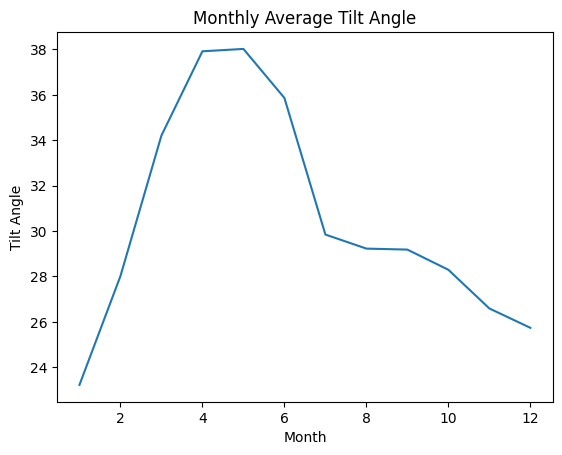

In [ ]:
df_year = df_full[(df_full['date_time'] >= pd.Timestamp(2022,1,1,0)) & (df_full['date_time'] < pd.Timestamp(2023,1,1,0))]
df_year['month'] = df_year['date_time'].apply(lambda x: x.month)
df_year['day'] = df_year['date_time'].apply(lambda x: x.day)
monthly_tilt = df_year.groupby(['month']).mean()
sns.lineplot(data=monthly_tilt, x='month', y=7, palette='sky_blue')
plt.xlabel('Month')
plt.ylabel('Tilt Angle')
plt.title('Monthly Average Tilt Angle')
plt.savefig('monthly tilt angle.png')
plt.show()

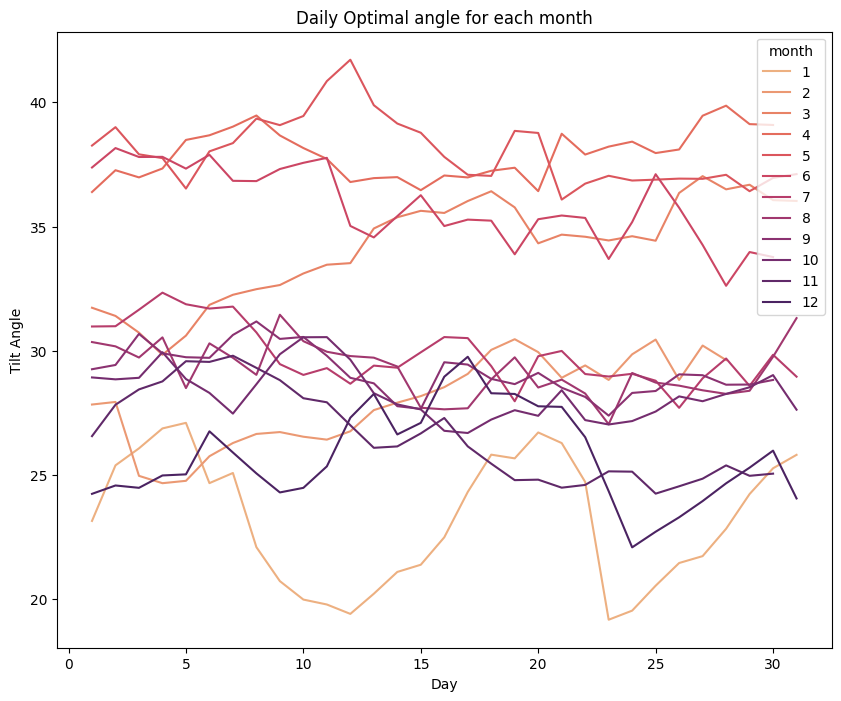

In [ ]:
_df = df_year.groupby(['month', 'day']).mean()
months = ['Januaray', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(10,8))
sns.lineplot(data=_df, y=7, x='day', hue='month', legend='full', palette='flare')
plt.xlabel('Day')
plt.ylabel('Tilt Angle')
plt.title('Daily Optimal angle for each month')
plt.savefig('daily optimal angle.png')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = df[['DY', 'HR']]
y = df['tilt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, silent=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f} degrees")

month = int(input("Enter month (1-12): "))
day = int(input("Enter day of the month: "))
hour = int(input("Enter hour (0-23): "))

date_str = f"2024-{month:02d}-{day:02d}"
day_of_year = datetime.strptime(date_str, "%Y-%m-%d").timetuple().tm_yday

predicted_tilt = model.predict([[day_of_year, hour]])[0]
print(f"Predicted Tilt Angle on {month:02d}/{day:02d} at {hour}:00 → {predicted_tilt:.2f} degrees")


Mean Absolute Error: 7.97 degrees
Enter month (1-12): 6
Enter day of the month: 23
Enter hour (0-23): 16
Predicted Tilt Angle on 06/23 at 16:00 → 23.00 degrees


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import pytz
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = df[['DY', 'HR']]
y = df['tilt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, silent=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f} degrees")

ist = pytz.timezone('Asia/Kolkata')
now_ist = datetime.now(ist)
day_of_year, hour = now_ist.timetuple().tm_yday, now_ist.hour

predicted_tilt = model.predict([[day_of_year, hour]])[0]
print(f"Predicted Tilt Angle on {now_ist.strftime('%Y-%m-%d')} at {hour}:00 IST → {predicted_tilt:.2f} degrees")


Mean Absolute Error: 7.97 degrees
Predicted Tilt Angle on 2025-02-21 at 14:00 IST → 48.31 degrees


In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predictions on test set
y_pred = model.predict(X_test)

# Compute metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error

# Print Accuracy Metrics
print("Model Performance Metrics")
print(f"R² Score: {r2:.4f}")  # Closer to 1 is better
print(f"Mean Absolute Error (MAE): {mae:.4f}°")  # Lower is better
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}°")  # Lower is better
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")  # Lower is better

# Estimate accuracy percentage
accuracy = 100 - mape
print(f"Estimated Model Accuracy: {accuracy:.2f}%")


Model Performance Metrics
R² Score: 0.8175
Mean Absolute Error (MAE): 7.9734°
Root Mean Squared Error (RMSE): 9.5855°
Mean Absolute Percentage Error (MAPE): 51.11%
Estimated Model Accuracy: 48.89%


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import pytz
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Feature Engineering: Creating new features
df['month'] = df['date_time'].dt.month  # Extract Month
df['season'] = df['month'].apply(lambda x: (x % 12 + 3) // 3)  # Convert to season (1=Winter, 2=Spring...)

# Define features and target
X = df[['DY', 'HR', 'month', 'season']]
y = df['tilt']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CatBoost Model with Improved Hyperparameters
cat_model = CatBoostRegressor(silent=True)

# Hyperparameter Grid
param_grid = {
    'iterations': [500, 700, 1000],
    'learning_rate': [0.03, 0.05, 0.1],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [3, 5, 7]
}

# Use RandomizedSearchCV to find best parameters
tuner = RandomizedSearchCV(cat_model, param_distributions=param_grid, cv=5, n_iter=10, scoring='r2', n_jobs=-1, verbose=2)
tuner.fit(X_train, y_train)

# Train Best Model
best_model = tuner.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate Improved Model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape
print(f"R² Score: {r2:.4f}")  # Closer to 1 is better
print(f"Mean Absolute Error (MAE): {mae:.4f}°")  # Lower is better
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}°")  # Lower is better
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")  # Lower is better
print(f"Model Accuracy: {accuracy:.2f}%")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
R² Score: 1.0000
Mean Absolute Error (MAE): 0.0426°
Root Mean Squared Error (RMSE): 0.0567°
Mean Absolute Percentage Error (MAPE): 0.38%
Model Accuracy: 99.62%
